**DEPENDENCIES**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Text, List, Dict, Set, Tuple, Optional, Union
from sklearn.model_selection import train_test_split


**DATA WRANGLING**

In [3]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
train_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


We now need to find patterns in the training data to make predictions for the test data.

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


We can observe that age has NaN values as well

***Feature Engineering***

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
for i in train_data.columns:
    print(i)
    print(train_data[i].isnull().value_counts())

PassengerId
False    891
Name: PassengerId, dtype: int64
Survived
False    891
Name: Survived, dtype: int64
Pclass
False    891
Name: Pclass, dtype: int64
Name
False    891
Name: Name, dtype: int64
Sex
False    891
Name: Sex, dtype: int64
Age
False    714
True     177
Name: Age, dtype: int64
SibSp
False    891
Name: SibSp, dtype: int64
Parch
False    891
Name: Parch, dtype: int64
Ticket
False    891
Name: Ticket, dtype: int64
Fare
False    891
Name: Fare, dtype: int64
Cabin
True     687
False    204
Name: Cabin, dtype: int64
Embarked
False    889
True       2
Name: Embarked, dtype: int64


so we need to handle missing values in age, cabin, embarked

In [9]:
train_data['Age'].isnull().value_counts()
#177/714

False    714
True     177
Name: Age, dtype: int64

In [10]:
# most frequent 10 ages
train_data['Age'].value_counts().head(10)

24.0    30
22.0    27
18.0    26
19.0    25
28.0    25
30.0    25
21.0    24
25.0    23
36.0    22
29.0    20
Name: Age, dtype: int64

To have a fair probability between all replacements, we need to normalize the frequency so the total sum of the probability is equal 1. 


In [11]:
#store top 10 ages and their frequencies
top_10_ages= train_data['Age'].value_counts().head(10).index.values
freq_of_top_10_ages= train_data['Age'].value_counts().head(10).values

#map func in python=> map(func, iterator)
age_probabilities= list(map(lambda value: (1/sum(freq_of_top_10_ages))*value ,freq_of_top_10_ages))


In [12]:
# np.random.choice(a, size=None, replace=True, p=None)
#p is the probabilities associated with each entry in a
#Generates a random sample from a given 1-D array a

train_data['Age']= train_data['Age'].apply( lambda value: value if not np.isnan(value) else np.random.choice(top_10_ages, p= age_probabilities))

In [13]:
train_data['Embarked'].isnull().value_counts()

False    889
True       2
Name: Embarked, dtype: int64

In [14]:
mode = train_data['Embarked'].value_counts().values[0]
train_data['Embarked'].fillna(mode, inplace=True)

In [15]:
train_data['Embarked'].isnull().value_counts()

False    891
Name: Embarked, dtype: int64

In [16]:
for i in train_data.columns[0:10]:
    print(i)
    print(train_data[i].unique())

PassengerId
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 24

we see that embarked has an unwanted value type, a numeric value


In [17]:
train_data['Embarked'].replace(to_replace= 644, value= train_data['Embarked'].value_counts().index.values[0], inplace= True)

In [18]:
train_data['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

All the features are stable now, we need to now understand the dataset before doing any more feature engineering

**EXPLORATORY DATA ANALYSIS**


Let's understand the correlation between variables to judge which might be helpful for predictions

In [19]:
train_corr= train_data.corr()
train_corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.022794,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.052688,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.342454,0.083081,0.018443,-0.549500
Age,0.022794,-0.052688,-0.342454,1.000000,-0.235708,-0.155646,0.097876
SibSp,-0.057527,-0.035322,0.083081,-0.235708,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.155646,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.097876,0.159651,0.216225,1.000000


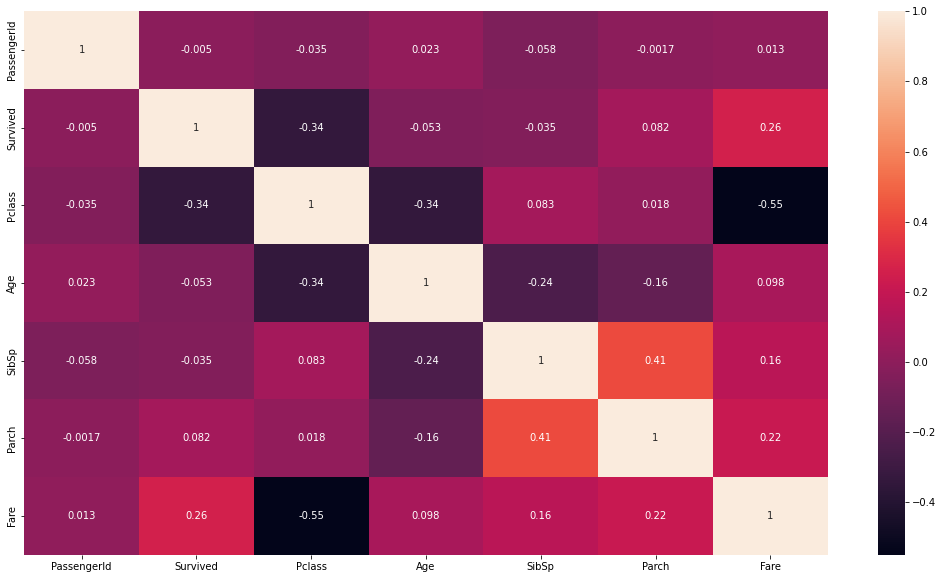

In [20]:
plt.figure(figsize=(18,10))
sns.heatmap(train_corr, annot=True)
plt.show()

Correlation needs to be improved. Let's go back to feature engineering

In [21]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


have worked with embarked, age till now. Let's see if we can do something with name

The idea behind slicing Name helps for observing patterns from the name of the passengers and converting them into a categorical feature.

In [22]:
for i in train_data[['Name','Sex']].values:
    print(i)

['Braund, Mr. Owen Harris' 'male']
['Cumings, Mrs. John Bradley (Florence Briggs Thayer)' 'female']
['Heikkinen, Miss. Laina' 'female']
['Futrelle, Mrs. Jacques Heath (Lily May Peel)' 'female']
['Allen, Mr. William Henry' 'male']
['Moran, Mr. James' 'male']
['McCarthy, Mr. Timothy J' 'male']
['Palsson, Master. Gosta Leonard' 'male']
['Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)' 'female']
['Nasser, Mrs. Nicholas (Adele Achem)' 'female']
['Sandstrom, Miss. Marguerite Rut' 'female']
['Bonnell, Miss. Elizabeth' 'female']
['Saundercock, Mr. William Henry' 'male']
['Andersson, Mr. Anders Johan' 'male']
['Vestrom, Miss. Hulda Amanda Adolfina' 'female']
['Hewlett, Mrs. (Mary D Kingcome) ' 'female']
['Rice, Master. Eugene' 'male']
['Williams, Mr. Charles Eugene' 'male']
['Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)' 'female']
['Masselmani, Mrs. Fatima' 'female']
['Fynney, Mr. Joseph J' 'male']
['Beesley, Mr. Lawrence' 'male']
['McGowan, Miss. Anna "Annie"' 'female']
['Sloper,

Basically, recategorising and forming a new column for title, but not just relying on the sex column, instead, actually extracting the title from the name and checking

In [23]:
TITLES = ('Mrs', 'Mr', 'Master', 'Miss', 'Major', 'Rev',
          'Dr', 'Ms', 'Mlle','Col', 'Capt', 'Mme', 'Countess',
          'Don', 'Jonkheer')

In [24]:
def patterns(name: Text, titles: Set) -> Optional[Text]:
    for title in titles:
        if title in name:
            return title
    return "Untitled"

In [25]:
train_data['Title']= train_data['Name'].apply(lambda name: patterns(name, TITLES))

In [26]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,30.0,1,2,W./C. 6607,23.4500,NaN,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr


In [27]:
def squeeze_title( dataframe:pd.DataFrame )-> Text:
    title= dataframe['Title']
    if title in ('Don', 'Major', 'Capt', 'Jonkheer', 'Rev', 'Col'):
        return 'Mr'
    elif title in ('Countess', 'Mme'):
        return 'Mrs'
    elif title in ('Mlle', 'Ms'):
        return 'Miss'
    elif title == 'Dr':
        if dataframe['Sex'] == 'male':
            return 'Mr'
        else:
            return 'Mrs'
    else:
        return title
    

In [28]:
train_data['Title']= train_data.apply(squeeze_title, axis=1)

In [29]:
train_data


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Mr
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,30.0,1,2,W./C. 6607,23.4500,NaN,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr


In [30]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
 12  Title        891 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


In [31]:
train_data['Cabin']

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [32]:
train_data.groupby('Pclass').count()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
Pclass,,,,,,,,,,,,
1,216,216,216,216,216,216,216,216,216,176,216,216
2,184,184,184,184,184,184,184,184,184,16,184,184
3,491,491,491,491,491,491,491,491,491,12,491,491


In [33]:
train_data['Cabin']

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [34]:
cabin_list = ['A', 'B', 'C', 'D', 'E', 'F', 'T', 'G', 'Unknown']

In [35]:
train_data['Deck'] = train_data['Cabin'].apply(lambda letter: patterns(str(letter), cabin_list))
train_data.drop(columns='Cabin', inplace=True)

In [36]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr,Untitled
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,Untitled
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr,Untitled
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,Mr,Untitled
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,Miss,B
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,30.0,1,2,W./C. 6607,23.4500,S,Miss,Untitled
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,Mr,C


Siblings/ Spouses and Parent/Children:

Visualise and get correlation with survival rate

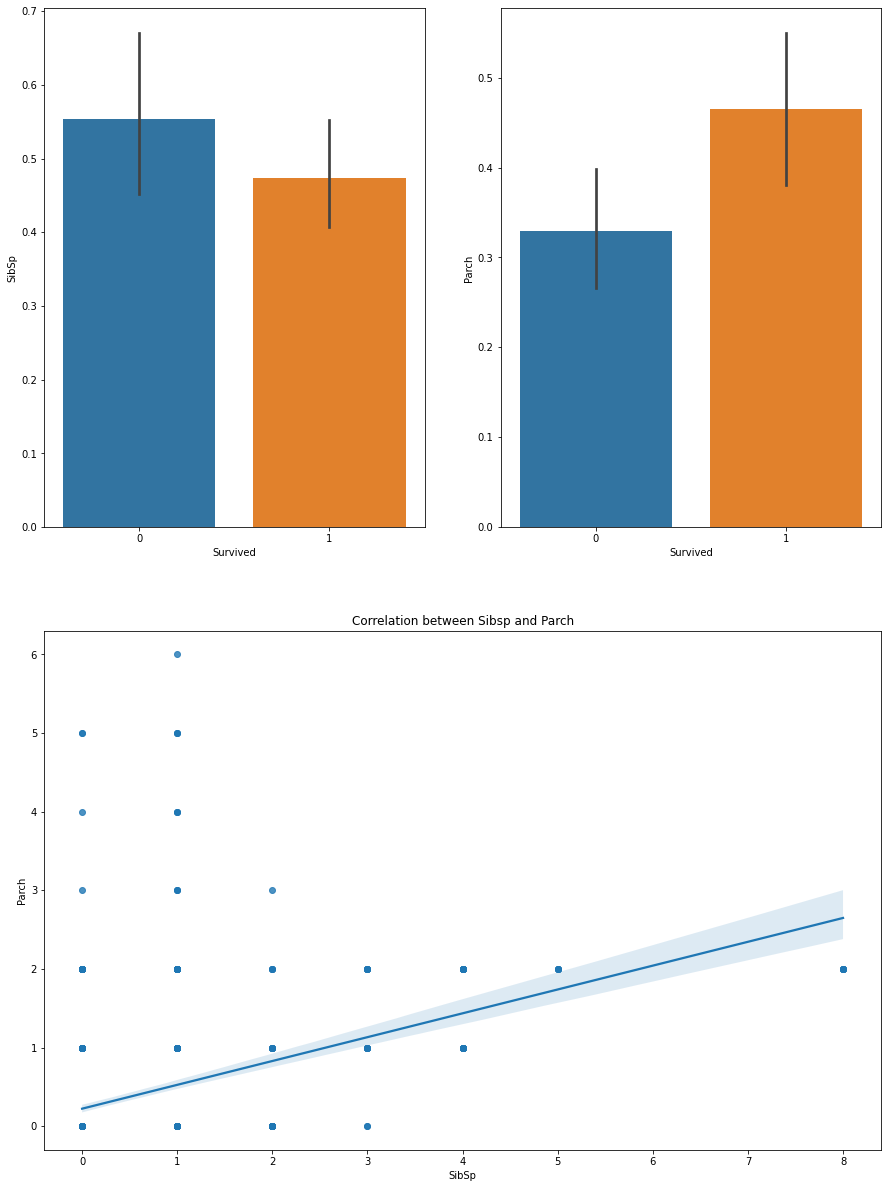

In [37]:
fig= plt.figure(figsize=(15,21))
ss= fig.add_subplot(221)
pc= fig.add_subplot(222)
ss_pc= fig.add_subplot(2,2,(3,4))

#background:
#The position of the subplot described by one of
#Three integers (nrows, ncols, index). The subplot will take the index position on a grid with nrows rows and ncols columns. index starts at 1 in the upper left corner and increases to the right. index can also be a two-tuple specifying the (first, last) indices (1-based, and including last) of the subplot, e.g., fig.add_subplot(3, 1, (1, 2)) makes a subplot that spans the upper 2/3 of the figure.
#A 3-digit integer. The digits are interpreted as if given separately as three single-digit integers, i.e. fig.add_subplot(235) is the same as fig.add_subplot(2, 3, 5). Note that this can only be used if there are no more than 9 subplots.


sns.barplot(x='Survived', y='SibSp', data=train_data, ax= ss)
sns.barplot(x='Survived', y='Parch', data=train_data, ax= pc)

ss_pc.title.set_text("Correlation between Sibsp and Parch")
sns.regplot(x='SibSp', y='Parch', data=train_data, ax= ss_pc)
            
plt.show()


There's a positive correlation between sibsp and parch. That is, people with family relations, it's more likely they didn't survive themselves, but saved their family relations first. Even out of these, more so the ones with a sibling/ spouse more than a kid/ parent.

Why not just add the two columns since they represent the same idea (will be really efficient in case of decision trees)

In [38]:
train_data['Family_size']= train_data['SibSp']+ train_data['Parch']

In [39]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Deck,Family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr,Untitled,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,Untitled,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs,C,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr,Untitled,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,Mr,Untitled,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,Miss,B,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,30.0,1,2,W./C. 6607,23.4500,S,Miss,Untitled,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,Mr,C,0


Let's see the relation between age and pclass

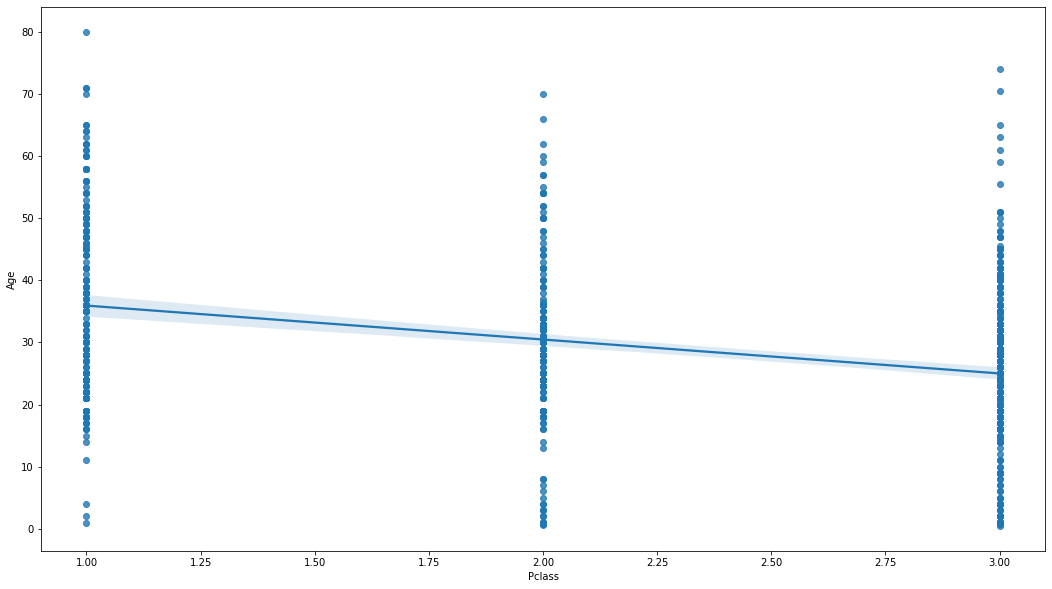

In [40]:
plt.figure(figsize=(18,10))
sns.regplot(x='Pclass', y='Age', data= train_data)
plt.show()

Can we consider relating pclass and fare?

if anyone has a fare=0, can't


In [41]:
train_data[['Pclass','Fare']].loc[train_data['Fare']==0,:]

,Pclass,Fare
179,3,0.0
263,1,0.0
271,3,0.0
277,2,0.0
302,3,0.0
413,2,0.0
466,2,0.0
481,2,0.0
597,3,0.0
633,1,0.0


so can't relate pclass with fare

Does age affect the target variable( survival rate)

In [42]:
train_data['Survived']


0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [43]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
 11  Title        891 non-null    object 
 12  Deck         891 non-null    object 
 13  Family_size  891 non-null    int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 97.6+ KB


In [44]:
tester= train_data.copy()
tester[['Survived','Died']]= pd.get_dummies(tester['Survived'])
new= tester[['Age','Survived','Died']].groupby('Age').sum()
new.reset_index(inplace=True)
#sorting values by two columns means that if the first column has same values, then sort according to the second column
new.sort_values(by=['Died','Survived'], ascending=False, inplace=True)
new


,Age,Survived,Died
48,36.0,20,20
31,24.0,32,18
28,22.0,30,16
33,25.0,30,16
23,18.0,30,15
...,...,...,...
49,36.5,1,0
71,55.5,1,0
82,66.0,1,0
84,70.5,1,0


Most young people of the age 24 died

Can we get a relation between age and fare?
(will fail if correlation is low)

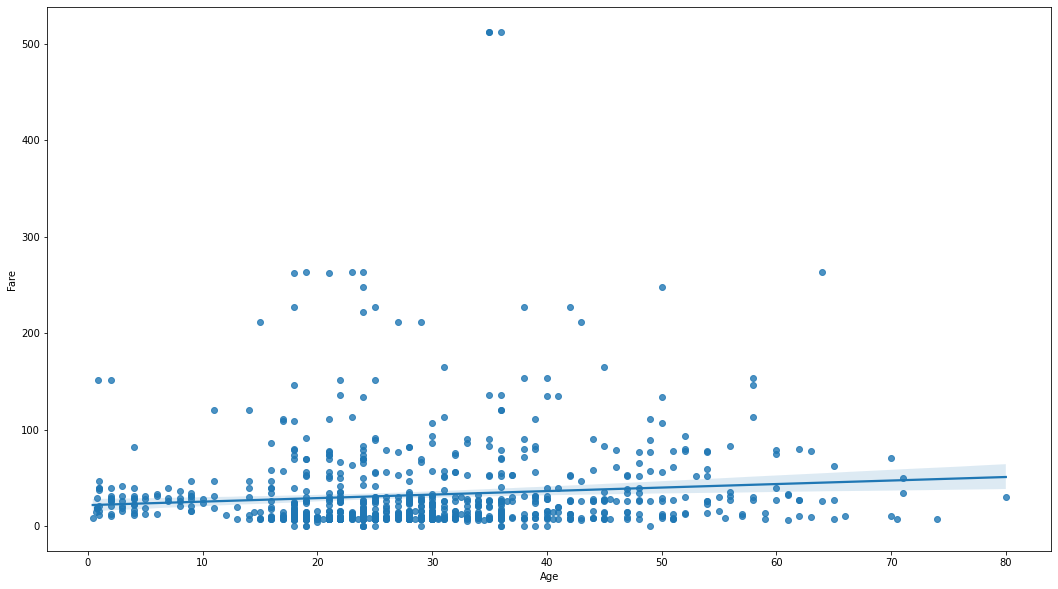

In [45]:
plt.figure(figsize=(18,10))
sns.regplot(x='Age',y='Fare',data=train_data)
plt.show()

Can't relate age and fare bcoz of the weak linear correlation


Let's now clear our dataset of useless columns and move onto the further steps like train test split


In [46]:
#inplace=true just means that the actual data is mutated when u apply an operation. It doesn't create a copy or something
train_data.drop(columns=['Name','Ticket','PassengerId'], inplace=True)


In [47]:
COLUMNS = ['Title', 'Sex', 'Age', 'SibSp', 'Parch', 'Family_size', 'Pclass',
           'Fare', 'Deck', 'Embarked', 'Survived']
train_data = train_data[COLUMNS]
train_data

,Title,Sex,Age,SibSp,Parch,Family_size,Pclass,Fare,Deck,Embarked,Survived
0,Mr,male,22.0,1,0,1,3,7.2500,Untitled,S,0
1,Mrs,female,38.0,1,0,1,1,71.2833,C,C,1
2,Miss,female,26.0,0,0,0,3,7.9250,Untitled,S,1
3,Mrs,female,35.0,1,0,1,1,53.1000,C,S,1
4,Mr,male,35.0,0,0,0,3,8.0500,Untitled,S,0
...,...,...,...,...,...,...,...,...,...,...,...
886,Mr,male,27.0,0,0,0,2,13.0000,Untitled,S,0
887,Miss,female,19.0,0,0,0,1,30.0000,B,S,1
888,Miss,female,30.0,1,2,3,3,23.4500,Untitled,S,0
889,Mr,male,26.0,0,0,0,1,30.0000,C,C,1


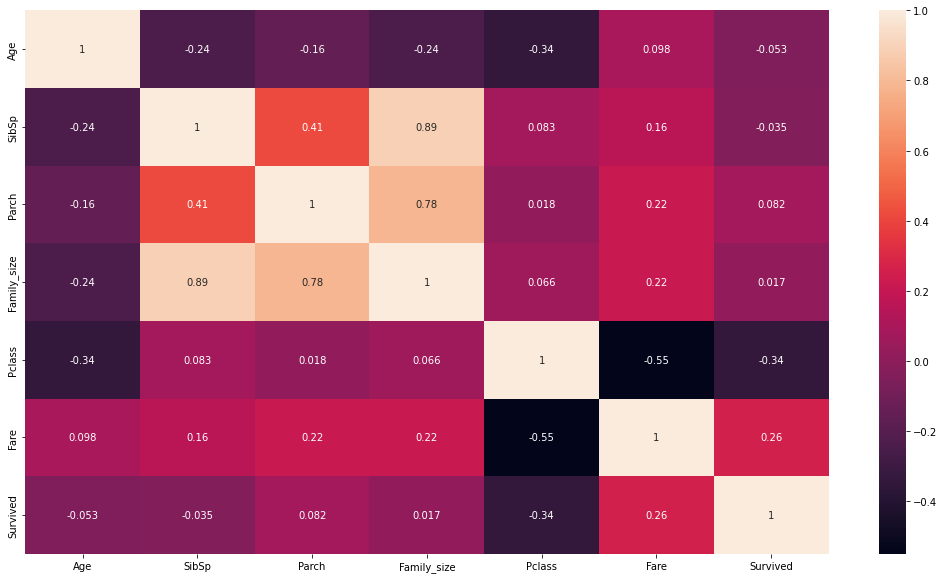

In [48]:
plt.figure(figsize=(18,10))
sns.heatmap(train_data.corr(), annot=True)
plt.show()

Correlation heatmap looks good, let's now move to the next step after feature engg

**TRAIN AND TEST SPLIT**

In [49]:
train_data.dtypes

Title           object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Family_size      int64
Pclass           int64
Fare           float64
Deck            object
Embarked        object
Survived         int64
dtype: object

In [50]:
# always make sure your categorical vars are numeric before splitting into train-test
train_data = pd.get_dummies(train_data, columns = ['Title','Sex','Deck','Embarked'])
train_data

,Age,SibSp,Parch,Family_size,Pclass,Fare,Survived,Title_Master,Title_Miss,Title_Mr,...,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_Untitled,Embarked_C,Embarked_Q,Embarked_S
0,22.0,1,0,1,3,7.2500,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
1,38.0,1,0,1,1,71.2833,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2,26.0,0,0,0,3,7.9250,1,0,1,0,...,0,0,0,0,0,0,1,0,0,1
3,35.0,1,0,1,1,53.1000,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,35.0,0,0,0,3,8.0500,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.0,0,0,0,2,13.0000,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
887,19.0,0,0,0,1,30.0000,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
888,30.0,1,2,3,3,23.4500,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
889,26.0,0,0,0,1,30.0000,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0


In [51]:
# before splitting, specify what is your X and Y
y_label= train_data['Survived']
# pandas loc is for selecting entries according to label names
# pandas iloc is for selecting entries according to index of the columns/rows
X_features= train_data.iloc[:,:-1]
X_features

,Age,SibSp,Parch,Family_size,Pclass,Fare,Survived,Title_Master,Title_Miss,Title_Mr,...,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_Untitled,Embarked_C,Embarked_Q
0,22.0,1,0,1,3,7.2500,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,38.0,1,0,1,1,71.2833,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,26.0,0,0,0,3,7.9250,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,35.0,1,0,1,1,53.1000,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,35.0,0,0,0,3,8.0500,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.0,0,0,0,2,13.0000,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
887,19.0,0,0,0,1,30.0000,1,0,1,0,...,1,0,0,0,0,0,0,0,0,0
888,30.0,1,2,3,3,23.4500,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
889,26.0,0,0,0,1,30.0000,1,0,0,1,...,0,1,0,0,0,0,0,0,1,0


In [52]:
folds=4 #75, 25 split
# random state- shuffling applied to the data before the split
# stratify- When it splits the label, it will make sure that the proportion of the training label is similar to the proportion of the testing label.

X_train, X_test, Y_train, Y_test= train_test_split(X_features, y_label, test_size=(1/folds), random_state= 42, stratify= y_label)

 **ALGORITHM SETUP**
 
 But first, we want to make sure that our datasets have transformed & normalized, correctly. So, we're going to build a transformed pipeline to add our features into it.

There was a slightly different approach taken here- algo setup for estimators, and then gridsearchCV or some model like that.
Will do that when I understand that fully

For now, I'm applying simple ML models

Need to convert categorical data to numerical


In [53]:
train_data.dtypes

Age              float64
SibSp              int64
Parch              int64
Family_size        int64
Pclass             int64
Fare             float64
Survived           int64
Title_Master       uint8
Title_Miss         uint8
Title_Mr           uint8
Title_Mrs          uint8
Sex_female         uint8
Sex_male           uint8
Deck_A             uint8
Deck_B             uint8
Deck_C             uint8
Deck_D             uint8
Deck_E             uint8
Deck_F             uint8
Deck_G             uint8
Deck_T             uint8
Deck_Untitled      uint8
Embarked_C         uint8
Embarked_Q         uint8
Embarked_S         uint8
dtype: object

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, mean_absolute_error, mean_squared_error

In [55]:
# why liblinear is something to ponder on
model = LogisticRegression(solver='liblinear', random_state=0)


**MODEL FITTING**

In [56]:
model.fit(X_train, Y_train)

LogisticRegression(random_state=0, solver='liblinear')

**MODEL PREDICTION**

In [57]:
Predictions= model.predict(X_test)

**MODEL EVALUATION**

In [58]:
model.score(X_test, Y_test)

1.0

In [59]:
mean_absolute_error= mean_absolute_error(Y_test, Predictions)
mean_absolute_error

0.0

In [60]:
confusion_matrix(Y_test, Predictions)
# row wise: true negative             false positive
#           false negative            true positive

array([[137,   0],
       [  0,  86]])

In [61]:
print(classification_report(Y_test, Predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       137
           1       1.00      1.00      1.00        86

    accuracy                           1.00       223
   macro avg       1.00      1.00      1.00       223
weighted avg       1.00      1.00      1.00       223



In [62]:
# #let's start with gender

# women = train_data.loc[train_data.Sex == "female"]["Survived"]
# rate_women = sum(women)/len(women)

# print(" % of women survived: ", rate_women*100)


# # print(" % of men survived: ", (1-rate_women)*100)
# # wrong approach- survival of men and women is independent

In [63]:
# men = train_data.loc[train_data.Sex == "male"]["Survived"]
# rate_men = sum(men)/len(men)

# print(" % of men survived: ", rate_men*100)


74% women survived, and only 18% men survived. Hence gender as a factor for survival was a good guess.

But now, considering various different columns for more complex patterns is difficult as well as time consuming, we'll let **ML** automate this process for us

We will be using the **Random Forest Algorithm** to make several decision trees using different column parameters to make distinct trees. Then, each of these trees will give an output of survival chance, and a collective decision will be made based on voting

In [64]:
# from sklearn.ensemble import RandomForestClassifier

# y = train_data["Survived"]

# features = ["Pclass", "Sex", "SibSp", "Parch"]

# # we now need to convert all our categorical features data into numeric binary format 
# X = pd.get_dummies(train_data[features])
# X_test = pd.get_dummies(test_data[features])



In [65]:
# # we want to make 100 different decision trees with PnC of the features, each having a maximum depth
# model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)

# model.fit(X,y)

In [66]:
# predictions = model.predict(X_test)

# output = pd.DataFrame({
#     'PassengerID' : test_data.PassengerId,
#     'Survived' : predictions
# })
# output.to_csv('submission.csv', index=False)
# print("Your submission was successfully saved!")